# Jeux du morpion - Tic-tac-toe

## Première étape : lister les règles et besoins 

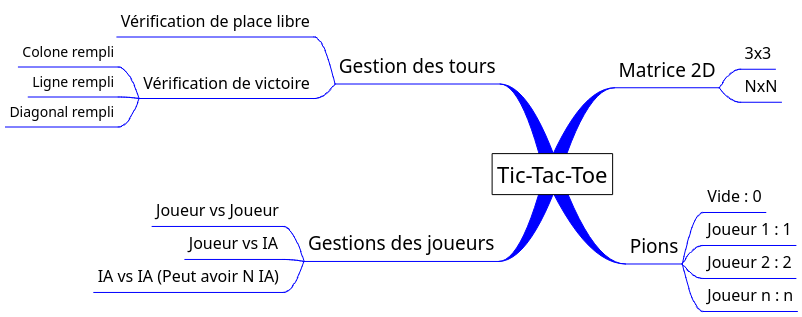

## Deuxième étape : Créer les fonctions des différents besoins

### Matrice 2D

Ici le choix a été fait d'utiliser les tableau numpy, cela permetra notament de généraliser la dimension 3x3 par NxN et de jouer des opérations matricielles pour optimiser notre codes (Limiter l'usage de boucle for et while).
On utilise la fonction zeros pour créer notre matrice d'entier naturel.

In [23]:
import numpy as np

# Création de notre objet central le plateau de jeux 'vide', rempli de 0
size = 3
matrix_game = np.zeros((size,size),dtype=np.int8)

# Affichage de notre tableau
print(matrix_game)

[[0 0 0]
 [0 0 0]
 [0 0 0]]


### Placement de pion
#### Diagramme fonction :
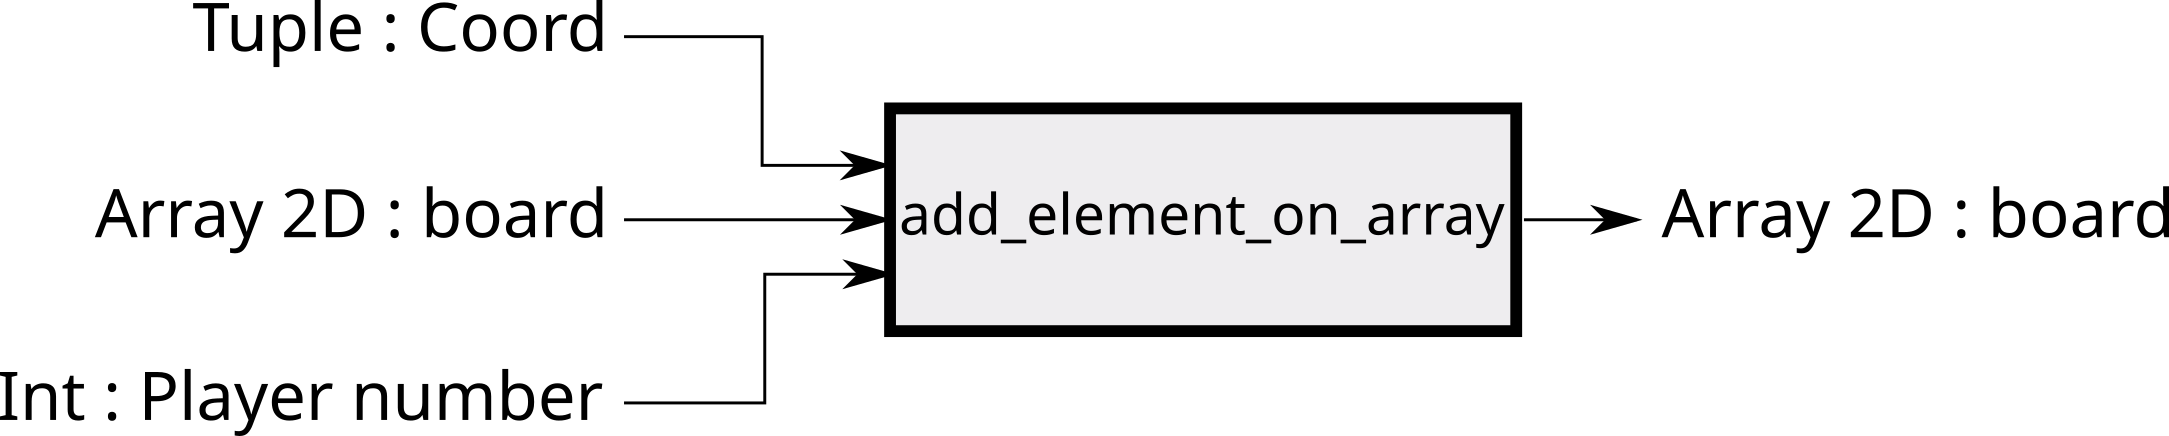

#### Séquence interne fonction :
1. Ajouter la valeur aux coordonées données
2. Retourner le tableau avec la valeur ajouté

*Les exemples suivant est donnée avec le docstring """ """ qui sert de notice pour la fonction (et de commentaire multi-lignes). Spécifiant nature des arguments et outputs, vous vous devez de faire ces lignes pour chaque fonction*


In [24]:
def add_element_on_array(array_2d, coord, value):
    """Will simply add the value argument on the array_2d with the specified coord.
    
    :param array_2d: The board matrix where the game is.
    :param coord: The coordinate (x,y) where to place value param, will erase old data with no check-up.
    :param value: The value corresponding to the player/bot number.
    :return: The board array with the new element added.
    """
    array_2d[coord[0],coord[1]]=value
    return array_2d

In [25]:
# Test de la fonction 
print("Board before modification :\n",matrix_game)
matrix_game = add_element_on_array(matrix_game, (1,1), 1)
print("Board after modification :\n",matrix_game)

# Remetre les valeurs initiales
matrix_game = add_element_on_array(matrix_game, (1,1), 0)

Board before modification :
 [[0 0 0]
 [0 0 0]
 [0 0 0]]
Board after modification :
 [[0 0 0]
 [0 1 0]
 [0 0 0]]


### Récupération des coordonées
#### Cas 1 : pour une IA

Ici l'objectif est de "simuller un IA" simple, qui choisira de manière aléatoire où placer son pion. Ce dernier se devra de choisir parmis les coordonées "vide" (contenant 0). Cette première approche pourait par la suite être améliorer en créant des règles "intéligente" de placement en fonction des pions de l'autre joueurs.

##### Diagrame fonction :
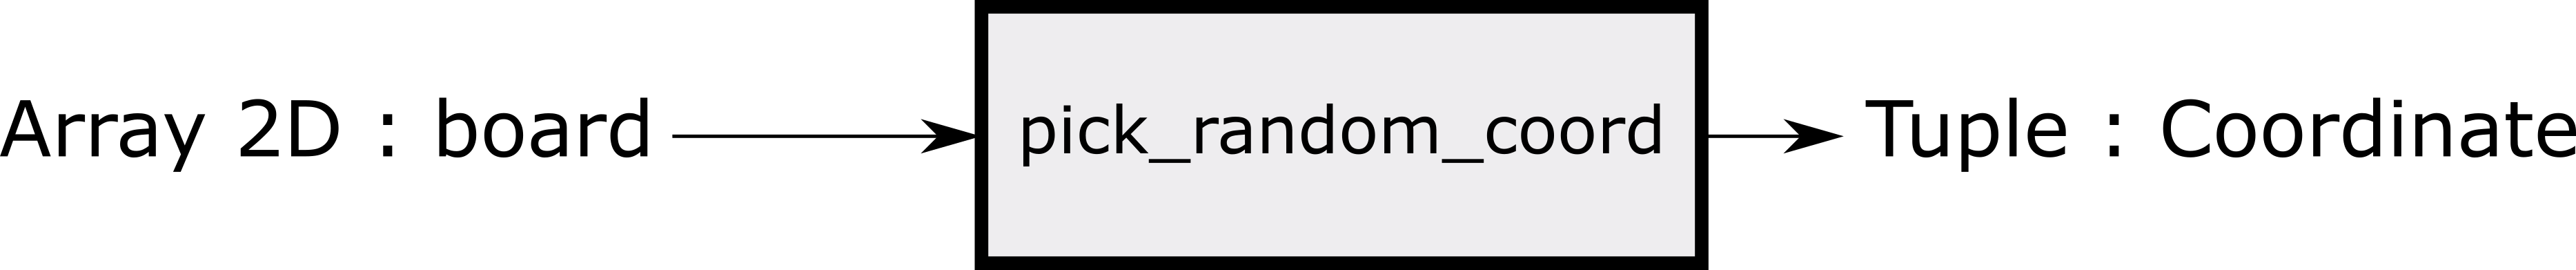

##### Séquence interne fonction :
1. Récuperer les coordonées où sont les 0, pour se faire nous utilison la fonction **numpy.where()**
2. Choisir un élément au hasard parmis la liste de coordonées récupéré. On va utiliser **numpy.random.randint()**
3. Retourner les coordonées sous la forme d'un **Tuple** : (x,y)

In [26]:
def pick_random_coord(array_2d):
    """Choose coordinate between available spot on the array, "Basic IA"

    :param array_2d: The board matrice.
    :return: Tuple of a random pick coordinate (x, y) among available place.
    """

    list_coord = np.where(array_2d==0)
    rdm_number = np.random.randint(0,len(list_coord[0]))
    return (list_coord[0][rdm_number],list_coord[1][rdm_number])

In [27]:
# Test de la fonction que l'on test plusieur fois
for i in range(4):
    test_coord = pick_random_coord(matrix_game)
    print(f"La coordonée {i} tirée est : {test_coord}")

# Vérificiation que l'on prend pas des positions déja occupées
matrix_game = add_element_on_array(matrix_game, (0,1), 1)
matrix_game = add_element_on_array(matrix_game, (1,1), 1)
matrix_game = add_element_on_array(matrix_game, (1,2), 1)

print("=================\nLa matrice pré-rempli :\n", matrix_game)

for i in range(4):
    test_coord = pick_random_coord(matrix_game)
    print(f"La coordonée {i} tirée est : {test_coord}")
    
# Remise à zeros de la matrice pour la suite
matrix_game = np.zeros((size,size),dtype=np.int8)

La coordonée 0 tirée est : (2, 2)
La coordonée 1 tirée est : (0, 0)
La coordonée 2 tirée est : (2, 1)
La coordonée 3 tirée est : (2, 0)
La matrice pré-rempli :
 [[0 1 0]
 [0 1 1]
 [0 0 0]]
La coordonée 0 tirée est : (2, 2)
La coordonée 1 tirée est : (2, 1)
La coordonée 2 tirée est : (2, 2)
La coordonée 3 tirée est : (2, 0)


#### Cas 2 : pour un Humain

Les inter-actions humain-machines sont le plus souvent difficile à gerer, il convient de les limiter au strict nécéssaire et favoriser des variables préalablement inscrise par l'utilisateur.

Dans le cas du TicTaCToe devant gerer une notion de tour et de réitérer la demande à chaque tour, l'interaction est nécéssaire. Dans ce cas il convient de **toujours vérifier que les valeurs/objets récupéré sont de bonne nature et cohérente**.

##### Diagrame fonction :
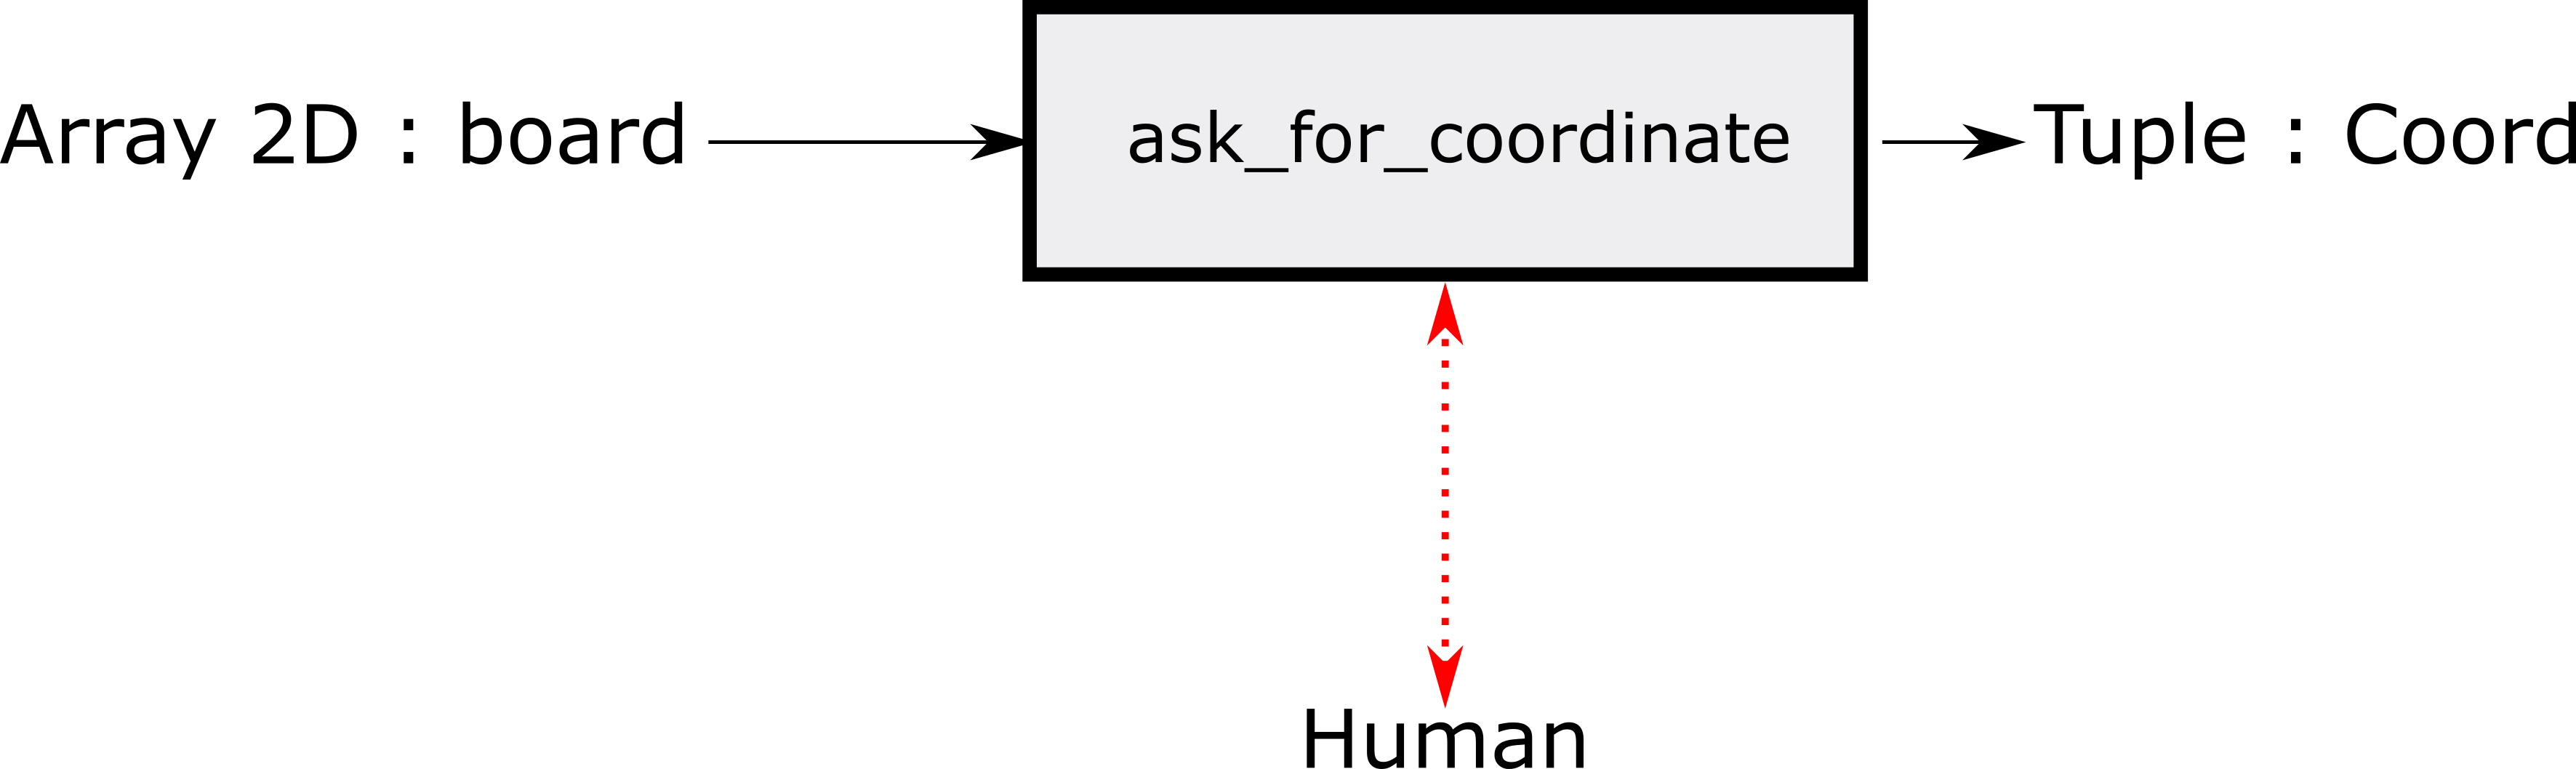

##### Séquence interne :
Les interactions sont peut être un des rare cas où la boucle **while** est un impératif, en effet nous devrons vérifier les informations tapé par l'opérateur et lui redemander le cas échéant. L'utilisation de **Try/Except** évitera de faire planter le programme en cas d'ereur de la part de l'opérateur.

La fonction **input()** nous envoie un **str**, il conviendra ensuite de convertir cette chaine de caractère en valeur numérique à l'aide de **eval()**

Dans la boucle While :
1. Demander les coordonées avec **input()**
    1. L'opérateur à donner des coordonées correcte
        1. Sortir de la boucle et renvoyer les coordonnées
    2. L'opérateur à donner des coordonées en dehors du tableau
        1. Indiquer la nature de l'erreur à l'opérateur
        2. Recommencer la boucle
    3. L'opérateur à choisi une coordonée déja occupé
        1. Indiquer que la place est occupé
        2. Réafficher le plateau
        3. Recommancer la boucle
    4. L'opérateur n'a pas respecté le format demandé
        1. Indiquer la nature de l'erreur à l'opérateur
        2. Recommencer la boucle

In [28]:
def ask_for_coordinate(array_2d):
    """Will ask for coordinate until it gets proper coordinate then return it
    
    :param array_2d: The board game
    :return: The verified coordinate in a tuple (x, y)
    """
    checker = True
    while checker:
        try:
            str_coord = input("Please give the coordinate in the following format : x,y\n")
            str_coord_x, str_coord_y = str_coord.split(",")
            coord_x, coord_y = int(eval(str_coord_x)),  int(eval(str_coord_y))
            if (coord_x < array_2d.shape[0] and coord_y < array_2d.shape[1]) and array_2d[coord_x,coord_y]==0:
                checker = False
                coord = (coord_x, coord_y)
                print(f"You choose : x={coord[0]} and y={coord[1]} as coordinate.")
            elif (coord_x >= array_2d.shape[0] and coord_y >= array_2d.shape[1]):
                print(f"Your coordinate are out of bound for a board of {array_2d.shape}")
            elif array_2d[coord_x,coord_y]==0:
                print("This place is already taken !")
                print(array_2d)
            else:
                print("Unknown error")
        except:
            print("!!! An error occurred, please make sure of the format : x,y !!! ")
    return coord

In [29]:
# Test de notre fonction
coord = ask_for_coordinate(matrix_game)
print(coord,type(coord))

Please give the coordinate in the following format : x,y
2,2,
!!! An error occurred, please make sure of the format : x,y !!! 
Please give the coordinate in the following format : x,y
2,2
You choose : x=2 and y=2 as coordinate.
(2, 2) <class 'tuple'>


### Les vérifieurs

#### Vérifier si on dispose encore d'espace pour les pions

##### Diagrame fonction :
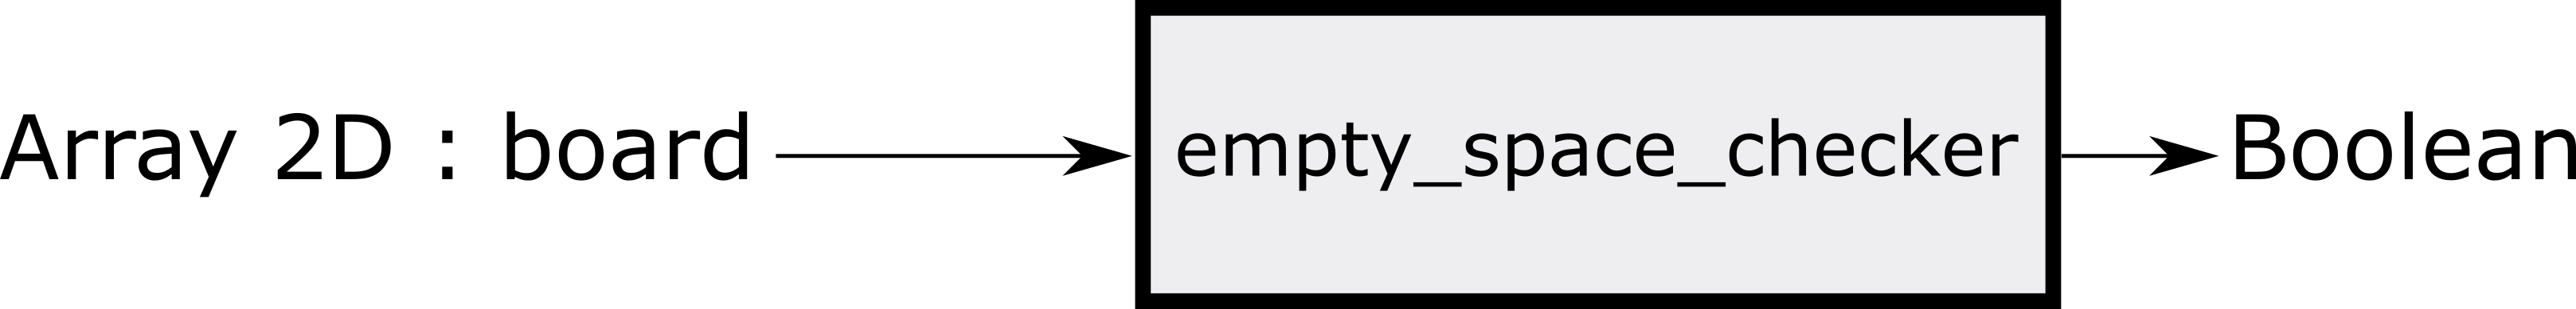


##### Séquence interne fonction :
1. Vérifier si un 0 est dans le tableau avec **in**
    2. **Si oui** :Retourner True
    2. **Sinon** : Retourner False



In [12]:
def empty_space_checker(array_2d):
    """Boolean checker is empty space are on the array

    :param array_2d: The board game
    :return: Boolean : True or False
    """
    if 0 in array_2d:
        return True

    return False

#### Vérification de victoire

C'est ici que le coeur de notre jeux va résider. On va tirer partit du formalisme mathématique afin de simplifier le processus de vérification et de le généraliser pour un plateau de n'importe quel taille.

##### Diagrame fonction :
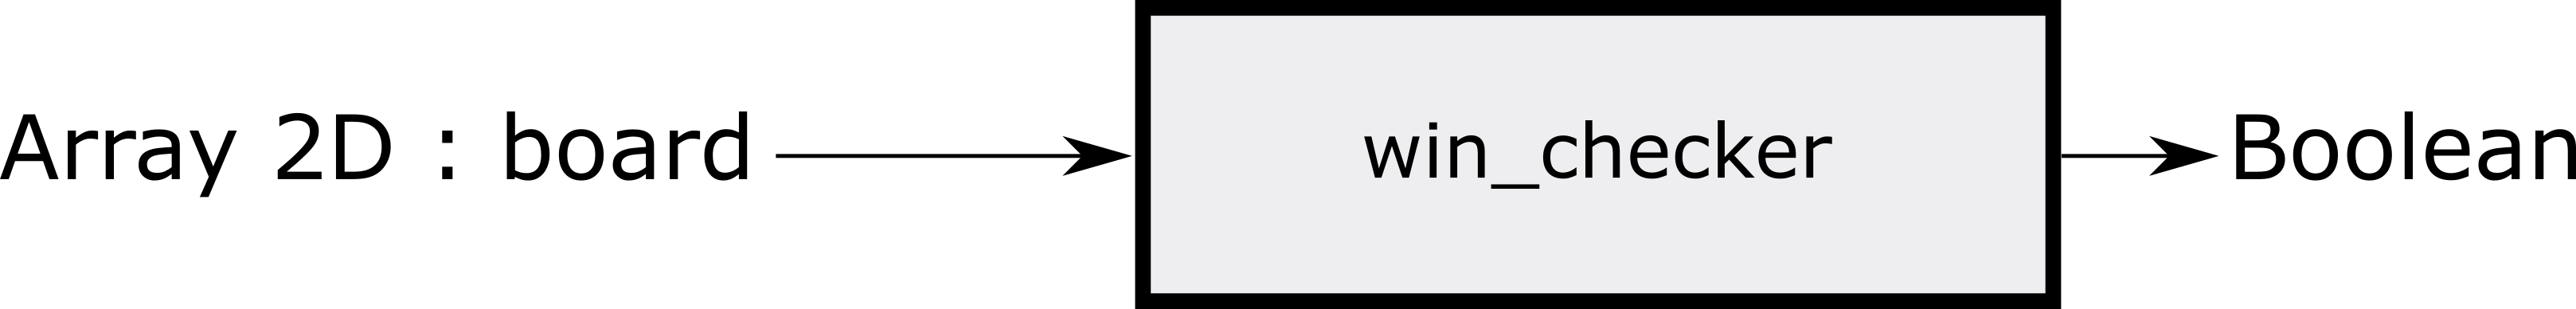

##### Séquence interne fonction :
1. Genérer une ligne rempli de la valeur à vérifier en fonction de la taille du plateau
2. Genérer de une matrice diagonal en fonction du plateau, ici en utilisant la ligne précédante genéré.
3. Vérifier que les diagonales avec la comparaison de matrice offert par **numpy.array_equal(arr_1,arr_2)**
    1. **Si oui** : Retourner **True**
4. faire une boucle avec N élément (N étant la taille du plateau)
    1. Vérifier la ligne n
        1. **Si oui** : Retourner **True**
    1. Vérifier la colone n
        1. **Si oui** : Retourner **True**
5. Retourner **False** le cas échéant.

In [32]:
def win_checker(array_2d,value_to_check):
    """Basic boolean check if victory condition is met

    :param array_2d: The board game
    :param value_to_check: The id of the player entity
    :return: Boolean : True of False
    """
    ligne_patern=np.ones(array_2d.shape[0],dtype=np.int8)
    ligne_patern=ligne_patern*value_to_check

    # Cheking for diagonal patern
    if np.array_equal(np.diag(array_2d),ligne_patern) or np.array_equal(np.diag(np.rot90(array_2d)),ligne_patern):
        return True

    # Checking for horizontal and vertical patern
    for idx in range(array_2d.shape[0]):
        if np.array_equal(array_2d[idx,:],ligne_patern):
            return True
        elif np.array_equal(array_2d[:,idx],ligne_patern):
            return True

    return False

## Assembler les blocs

Maintenant il ne reste plus qu'à assembler nos outils dans une boucles, qui à pour condition de fin la victoire d'un des joueur ou le match nul.

Redécomposons les étapes d'une manche :

1. Verifier que l'on dispose d'emplacement libre : 
    - Si oui : on continue
    - Si non : Fin de partie
0. Récupération de l'id du joueur ou de l'IA
2. Récuperer les coordonées du joueur ou de l'IA :
3. Placer le pion sur les coordonées.
4. Vérifier si le placement permet une victoire
    - Si oui : Fin de partie
    - Si non : Passer à la manche suivante

On répète ensuite ces étapes dans une boucles pour constituer une partie.

In [35]:
# Réalisation d'une manche 

# 0. Placer quelques pions pour simuller une partie en cours 
matrix_game = add_element_on_array(matrix_game, (0,0), 1)
matrix_game = add_element_on_array(matrix_game, (0,1), 2)
matrix_game = add_element_on_array(matrix_game, (1,1), 1)
matrix_game = add_element_on_array(matrix_game, (2,1), 2)

print("Starting board :\n", matrix_game)

# 1. Verifier si on dispose de place sur le plateau 
if empty_space_checker(matrix_game):
    # 2. récuperer ID jempty_space_checkeroueur
    id_player = 1 # Ici on atribut une valeur de test
    
    # 3. Demander les coordonnés (ici pour un joeur)
    coord = ask_for_coordinate(matrix_game)
    
    # 4. Placer le pion
    matrix_game = add_element_on_array(matrix_game, coord, id_player)
    
    # 5. Vérifier si victoire
    if win_checker(matrix_game, id_player):
        print(f"Victoire du joueur {id_player}")
    else:
        print("La partie continue")

# Si plus de place sur le plateau
else :
    print("C'est un match nul")
    
print("Final board :\n", matrix_game)

# Remise à zeros de la matrice pour la suite
matrix_game = np.zeros((size,size),dtype=np.int8)

Starting board :
 [[1 2 0]
 [0 1 0]
 [0 2 0]]
Please give the coordinate in the following format : x,y
1,2
You choose : x=1 and y=2 as coordinate.
La partie continue
Final board :
 [[1 2 0]
 [0 1 1]
 [0 2 0]]


Maintenant que l'on maitrise une manche et que l'on connait la "manche 0", nous devons appliquer la récurence à l'aide de l'opérateur while.

On va introduire ici aussi la notion de plusieur joueur, le choix a été fait de créer une liste avec les id des joueurs (allant de 1 à l'infinie...), ce formalisme permetra de répartir les hummains des IA et de faire des partie avec un nombre de joueur > 2. 

On va créer une variable boléene afin de suivre le statut de la partie et de commander la boucle while : "win_statut = False"

Le dernier outils qui nous faudra est un compteur qui suit le nombre de manche écoulé, se sera un entier **int**.

In [34]:
player_array = np.array([1,2])

win_statut = False
turn_count = 0

while not(win_statut): # La boucle while ne s'execute que si le booleen == True, not() permet d'inverser le résultat.
    if empty_space_checker(matrix_game):
        # Choisir l'id du joueur en fonction du tour, en utilisant la division euclidienne.
        id_player = player_array[(turn_count)%len(player_array)]
        
        #Affichage du plateau et des informations de jeux
        print(f"<=== Round {turn_count} ===>")
        print(f"===> Player {id_player} <===")
        print(matrix_game)
        
        
        #Réalisaton de la manche
        coord = ask_for_coordinate(matrix_game) # à remplacer avec pick_random_coord(matrix_game) pour le simulacre d'IA
        matrix_game = add_element_on_array(matrix_game, coord, id_player)
        
        # Vérification de victoire
        if win_checker(matrix_game, id_player):
            turn_count += 1
            print(matrix_game)
            print(f"Player {id_player} wins at round {turn_count} !")
            win_statut = True
        else:
            turn_count += 1
    else:
        win_statut = True
        print("It's a draw with a final board of :\n", matrix_game)
    
        
# Remise à zeros de la matrice pour la suite
matrix_game = np.zeros((size,size),dtype=np.int8)     

<=== Round 0 ===>
===> Player 1 <===
[[1 2 0]
 [0 1 0]
 [0 2 0]]
Please give the coordinate in the following format : x,y
0,2
You choose : x=0 and y=2 as coordinate.
<=== Round 1 ===>
===> Player 2 <===
[[1 2 1]
 [0 1 0]
 [0 2 0]]
Please give the coordinate in the following format : x,y
2,0
You choose : x=2 and y=0 as coordinate.
<=== Round 2 ===>
===> Player 1 <===
[[1 2 1]
 [0 1 0]
 [2 2 0]]
Please give the coordinate in the following format : x,y
0,1
Unknown error
Please give the coordinate in the following format : x,y
0,1
Unknown error
Please give the coordinate in the following format : x,y
1,0
You choose : x=1 and y=0 as coordinate.
<=== Round 3 ===>
===> Player 2 <===
[[1 2 1]
 [1 1 0]
 [2 2 0]]
Please give the coordinate in the following format : x,y
2,2
You choose : x=2 and y=2 as coordinate.
[[1 2 1]
 [1 1 0]
 [2 2 2]]
Player 2 wins at round 4 !


Nous avons maintenant un code fonctionel autorisant des parties entre humains, pour ce qui est d'un combat IA contre IA il suffit de remplacer la ligne ***coord = ask_for_coordinate(matrix_game)*** par ***coord = pick_random_coord(matrix_game)***. Le cas d'une IA contre un humain est plus délicat car il faut alterner entre les deux fonctions.

In [10]:
player_array = np.array([1,2])

win_statut = False
turn_count = 0

while not(win_statut): # La boucle while ne s'execute que si le booleen == True, not() permet d'inverser le résultat.
    if empty_space_checker(matrix_game):
        # Choisir l'id du joueur en fonction du tour, en utilisant la division euclidienne.
        id_player = player_array[(turn_count)%len(player_array)]
        
        #Affichage du plateau et des informations de jeux
        print(f"<=== Round {turn_count} ===>")
        print(f"===> Player {id_player} <===")
        print(matrix_game)
        
        
        #Réalisaton de la manche avec choix IA et Humain
        if id_player == 1:
            coord = ask_for_coordinate(matrix_game)
        else:
            coord = pick_random_coord(matrix_game)
        matrix_game = add_element_on_array(matrix_game, coord, id_player)
        
        # Vérification de victoire
        if win_checker(matrix_game, id_player):
            turn_count += 1
            print(matrix_game)
            print(f"Player {id_player} wins at round {turn_count} !")
            win_statut = True
        else:
            turn_count += 1
    else:
        win_statut = True
        print("It's a draw with a final board of :\n", matrix_game)
    
        
# Remise à zeros de la matrice pour la suite
matrix_game = np.zeros((size,size),dtype=np.int8)    

<=== Round 0 ===>
===> Player 1 <===
[[0 0 0]
 [0 0 0]
 [0 0 0]]
Please give the coordinate in the following format : x,y
0,0
You choose : x=0 and y=0 as coordinate.
<=== Round 1 ===>
===> Player 2 <===
[[1 0 0]
 [0 0 0]
 [0 0 0]]
<=== Round 2 ===>
===> Player 1 <===
[[1 2 0]
 [0 0 0]
 [0 0 0]]
Please give the coordinate in the following format : x,y
1,1
You choose : x=1 and y=1 as coordinate.
<=== Round 3 ===>
===> Player 2 <===
[[1 2 0]
 [0 1 0]
 [0 0 0]]
<=== Round 4 ===>
===> Player 1 <===
[[1 2 0]
 [0 1 2]
 [0 0 0]]
Please give the coordinate in the following format : x,y
2,2
You choose : x=2 and y=2 as coordinate.
[[1 2 0]
 [0 1 2]
 [0 0 1]]
Player 1 wins at round 5 !


Il convient maintenant d'encapsuler notre solution sous forme de fonction pour la rendre pratique d'utilisation. Des petits arangements et choix peuvent être fait ici aussi, les notres ont été de gerer les parties 1vs1 : IA contre IA, IA contre humain et Humain contre humain. A cela s'ajoute le fait de pouvoir faire des parties sur des plateaux de n'importe quel taille, ce qui rajoute la possibilité d'ajouter des joueurs (Est-ce toujours un jeux pertinant ?) pour les IA vs IA et Humain vs Humain. (Le cas humain vs IA ne sera pas traité ici pour les parties à plus de deux intervenant.)

En toute rigueur il aurait convenu de partir sur un formalisme objet, ce qui consiste a ranger nos fonctions dans des objets et rendre le programme indépendant et donc exploitable pour d'autres projets ou par d'autres personnes.


Tout ce travail n'est qu'une illustration de la mise en place d'un programme, il conviendra pour vos progets de tester les limites du programmes, par exemple pour le morpion :
- Jeux toujours pertinant si plateau plus grand que 3x3 ?
- Sur une taille NxN rencontrons nous le même problème qu'en 3x3 : Deux joeurs sachant jouer arriveront toujours à un match nul.
- Le jeux est il résoluble sur des tailles NxN pour un nombre de joueurs supérieur à deux ? Si oui quel est la limite/corrélation avec la taille du plateau.
- Dévelloper une meilleur IA, qui choisira en regardant le placement des autre pions pour gagner
- Etc...

Pour l'encapsulation nous assemblons notre ensemble en rajoutant des conditions dépendante du nombre de joueur et de la taille voulue du plateau.

In [37]:
def game_loop(nb_player=2,size=3,nb_bot=0):
    """Main loop where all our tool are assembled, set for player vs human, human vs human, IA vs IA (infinite number)

    The array can take all dimension wished

    :param nb_player: Number of Human player can go from 0 to 2
    :param size: Size of the desired board matrix.
    :param nb_bot: Number of bot player can go from 0 to infinite.
    """
    matrix_game = np.zeros((size,size),dtype=np.int8)
    turn_count = 0
    win_statut = False

    # Player list creation
    if nb_bot==1 and nb_player==1:
        entity_array = np.arange(2, dtype=np.int8) + int(1)
        if np.random.randint(0,2) == 1 :
            entity_array[0]=2
            entity_array[1]=1
        actual_entity = entity_array[turn_count]
    elif nb_player ==2:
        player_array = np.arange(nb_player,dtype=np.int8)+int(1)
        actual_player = player_array[turn_count]
    elif nb_bot>0:
        bot_array = np.arange(nb_bot, dtype=np.int8) + int(1)
        actual_bot = bot_array[turn_count]

    # Loop of game
    while not(win_statut):
        # Human vs Human
        if nb_player==2:
            print(f"<=== Round {turn_count} ===>")
            print(f"===> Player {actual_player} <===")
            print(matrix_game)
            if empty_space_checker(matrix_game):
                coord = ask_for_coordinate(matrix_game)
                matrix_game = add_element_on_array(matrix_game, coord, actual_player)
                if win_checker(matrix_game,actual_player):
                    turn_count += 1
                    print(matrix_game)
                    print(f"Player {actual_player} wins at round {turn_count} !")
                    win_statut = True
                else:
                    actual_player = player_array[(turn_count+1)%len(player_array)]
            else:
                print(matrix_game)
                print("It's a draw !")
                win_statut = True
        # IA vs IA
        elif nb_player == 0:
            print(f"<=== Round {turn_count} ===>")
            print(f"===> Player {actual_bot} <===")
            print(matrix_game)
            if empty_space_checker(matrix_game):
                coord = pick_random_coord(matrix_game)
                matrix_game = add_element_on_array(matrix_game, coord, actual_bot)
                if win_checker(matrix_game, actual_bot):
                    turn_count += 1
                    print(matrix_game)
                    print(f"Bot {actual_bot} wins at round {turn_count} !")
                    win_statut = True
                else:
                    actual_bot = bot_array[(turn_count+1) % len(bot_array)]
            else:
                print(matrix_game)
                print("It's a draw !")
                win_statut = True
        # Human Vs IA
        elif nb_player == 1 and nb_bot==1:
            if actual_entity == 1:
                print(f"<=== Round {turn_count} ===>")
                print(f"===> Player {actual_entity} <===")
                print(matrix_game)
                if empty_space_checker(matrix_game):
                    coord = ask_for_coordinate(matrix_game)
                    matrix_game = add_element_on_array(matrix_game, coord, actual_entity)
                    if win_checker(matrix_game, actual_entity):
                        turn_count += 1
                        print(matrix_game)
                        print(f"Player {actual_entity} wins at round {turn_count} !")
                        win_statut = True
                    else:
                        actual_entity = entity_array[(turn_count+1) % len(entity_array)]
            elif actual_entity == 2:
                print(f"<=== Round {turn_count} ===>")
                print(f"===> Bot {actual_entity} <===")
                print(matrix_game)
                if empty_space_checker(matrix_game):
                    coord = pick_random_coord(matrix_game)
                    matrix_game = add_element_on_array(matrix_game, coord, actual_entity)
                    if win_checker(matrix_game, actual_entity):
                        turn_count += 1
                        print(matrix_game)
                        print(f"Bot {actual_entity} wins at round {turn_count} !")
                        win_statut = True
                    else:
                        actual_entity = entity_array[(turn_count+1) % len(entity_array)]
        else :
            print("This configuration is not yet developed !")
        turn_count+=1


In [38]:
# Test de notre morpion avec 2 bot sur une matrice 5x5
game_loop(nb_player=0,size=10,nb_bot=5)

<=== Round 0 ===>
===> Player 1 <===
[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]
<=== Round 1 ===>
===> Player 2 <===
[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]
<=== Round 2 ===>
===> Player 3 <===
[[0 0 0 0 0 0 0 2 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]
<=== Round 3 ===>
===> Player 4 <===
[[0 0 0 0 0 0 0 2 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 3 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0

A vous de jouer avec tout ça en l'explorant et l'améliorant.